# <b><i><h>Predicting Bitcoin Price with Market Indicators & Trend Data</h></i></b>
Author: jooncco<br>
Created: 2018. 6. 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>
## <b>LOAD DATASET</b>

In [3]:
df = pd.read_csv('price_market.csv')    # 2012~2018
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
y = df['BTC_Price']
df = df.drop(['Date', 'BTC_Price'], axis=1)
print('Size of dataset: ', df.shape[0], 'x', df.shape[1])
df.head(5)

Size of dataset:  1583 x 15


,DOW_Price,NASDAQ_Price,GOLD_Price,USD_Price,US_BCI,US_CCI,US2TB,US30TB,ETH,XRP,US_INTR,S&P,BTCCash,LTC,Gsearch
Date,,,,,,,,,,,,,,,
2012-02-02,12705.41,2859.68,1756.8,79.11,100.07,98.71,110.37,144.59,0.0,0.0,0.75,1325.54,0.0,0.0,1
2012-02-03,12862.23,2905.66,1737.9,79.06,100.07,98.71,110.33,142.41,0.0,0.0,0.75,1344.90,0.0,0.0,1
2012-02-06,12845.13,2901.99,1722.8,79.19,100.07,98.71,110.35,143.28,0.0,0.0,0.75,1344.33,0.0,0.0,1
2012-02-07,12878.20,2904.08,1746.4,78.67,100.07,98.71,110.31,142.31,0.0,0.0,0.75,1347.05,0.0,0.0,1
2012-02-08,12883.95,2915.86,1729.3,78.73,100.07,98.71,110.30,142.22,0.0,0.0,0.75,1349.96,0.0,0.0,1


<i>Features</i>:<br>
Stocks : <b>Dow Jones Industrial Index, NASDAQ, S&P 500</b> <br>
Forex : <b>Gold (comex) Index, USD basket Index</b> <br>
OECD Economic Statistics : <b>US Business Confidence Index, US Consumer Confidence Index</b> <br>
Bonds : <b>US-2-year treasury bond futures, US-30-year treasury bond futures</b> <br>
Other Crypto-currencies : <b>Ethereum, Ripple, BTCCash, Litecoin</b> <br>
And Google Trends : <b>precentiles of "Bitcoin" searches on Google (1 : bottom 1%, 100 : top 100% percent of searches)</b> <br>

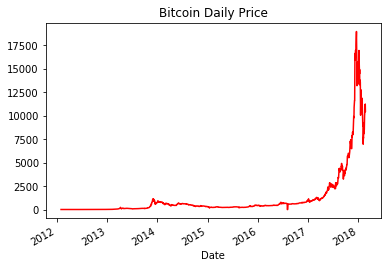

In [4]:
y.plot(title='Bitcoin Daily Price', style='r')

We have large dataset spanning from 2012 to 2018, but our main focus here is to predict next-day bitcoin price. In other words, our model will learn to detect local pattern in everyday market & trend data which reflects interday bitcoin price fluctuation.<br><br><br>

## <b>DATA EXPLORATION AND VISUALIZATION</b><br>

The volume and number of features of our dataset is too large. So we decided to do as following:<br>
1. Slice the time series<br>
2. Perform PCA on market data & trend data for variable selection<br>

Only significant parts of our data explorations are shown:<br><br>

1) Period of interest<br>

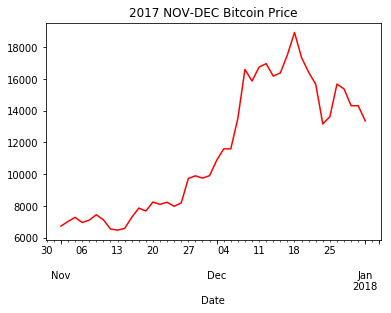

In [5]:
price_2017 = y['20171101':'20180101']
price_2017.plot(title='2017 NOV-DEC Bitcoin Price', style='r')

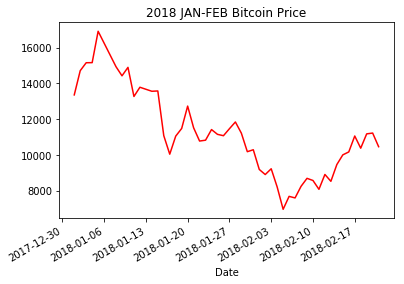

In [6]:
price_2018 = y['20180101':'20180301']
price_2018.plot(title='2018 JAN-FEB Bitcoin Price', style='r')

<br>
2) Correlation analysis on features

In [7]:
def color_high_val(val):
    color = "red" if val > 0.9 else 'black' 
    return 'color: %s' % color
corr_output = df.corr(method = 'pearson', min_periods = 1)
corr_output.style.applymap(color_high_val)

,DOW_Price,NASDAQ_Price,GOLD_Price,USD_Price,US_BCI,US_CCI,US2TB,US30TB,ETH,XRP,US_INTR,S&P,BTCCash,LTC,Gsearch
DOW_Price,1,0.984278,-0.56308,0.630469,0.624906,0.845362,-0.935729,0.315295,0.720688,0.609181,0.822728,0.983644,0.624257,0.675269,0.715972
NASDAQ_Price,0.984278,1,-0.629307,0.716821,0.542192,0.888361,-0.92338,0.400193,0.647413,0.540684,0.81395,0.993182,0.547246,0.601861,0.643577
GOLD_Price,-0.56308,-0.629307,1,-0.670698,-0.155182,-0.703301,0.404502,-0.195503,-0.0484824,-0.0368669,-0.2875,-0.667519,-0.0315272,-0.0511264,-0.123163
USD_Price,0.630469,0.716821,-0.670698,1,-0.0465423,0.887659,-0.628473,0.726016,0.136666,0.105012,0.62835,0.708305,0.087016,0.128213,0.159943
US_BCI,0.624906,0.542192,-0.155182,-0.0465423,1,0.291491,-0.528606,-0.35169,0.552356,0.444435,0.480552,0.553728,0.488355,0.522141,0.568572
US_CCI,0.845362,0.888361,-0.703301,0.887659,0.291491,1,-0.780472,0.557679,0.37216,0.293508,0.715796,0.893307,0.302826,0.346225,0.38753
US2TB,-0.935729,-0.92338,0.404502,-0.628473,-0.528606,-0.780472,1,-0.370174,-0.778419,-0.665131,-0.899906,-0.89382,-0.671964,-0.729173,-0.742999
US30TB,0.315295,0.400193,-0.195503,0.726016,-0.35169,0.557679,-0.370174,1,0.0799638,0.0549962,0.451751,0.378294,0.056275,0.071239,0.0647519
ETH,0.720688,0.647413,-0.0484824,0.136666,0.552356,0.37216,-0.778419,0.0799638,1,0.919539,0.585904,0.615691,0.90251,0.9334,0.865962
XRP,0.609181,0.540684,-0.0368669,0.105012,0.444435,0.293508,-0.665131,0.0549962,0.919539,1,0.469963,0.516716,0.875696,0.883299,0.764306


Strong correlation pairs:<br>
<b>(DOW_Price,NASDAQ_Price), (DOW_Price, S&P), (NASDAQ_Price, S&P), (ETH, XRP), (ETH, BTCCash), (ETH, LTC), (BTCCash, LTC), (BTCCash, Gsearch), (LTC, Gsearch)</b><br><br>

In [8]:
df_use = df['20171101':'20180301']

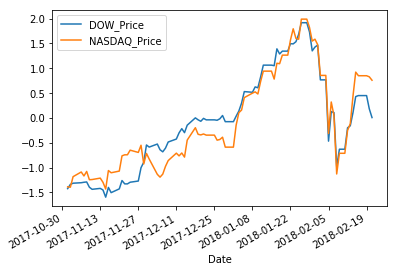

In [9]:
pair = df_use.loc[:, lambda df_use: ['DOW_Price', 'NASDAQ_Price']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

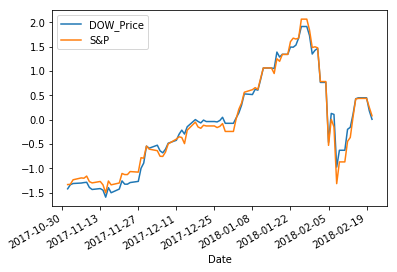

In [10]:
pair = df_use.loc[:, lambda df_use: ['DOW_Price', 'S&P']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

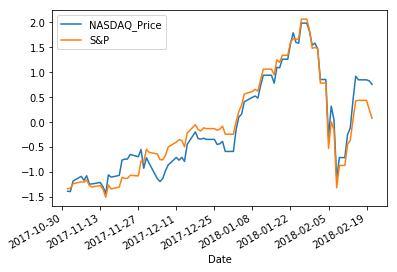

In [11]:
pair = df_use.loc[:, lambda df_use: ['NASDAQ_Price', 'S&P']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

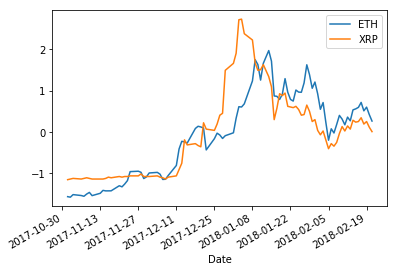

In [12]:
pair = df_use.loc[:, lambda df_use: ['ETH', 'XRP']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

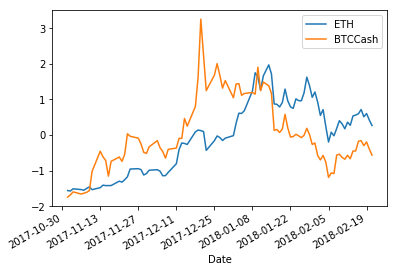

In [13]:
pair = df_use.loc[:, lambda df_use: ['ETH', 'BTCCash']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

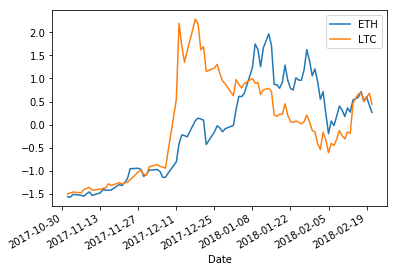

In [14]:
pair = df_use.loc[:, lambda df_use: ['ETH', 'LTC']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

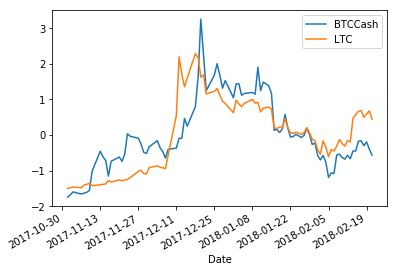

In [15]:
pair = df_use.loc[:, lambda df_use: ['BTCCash', 'LTC']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

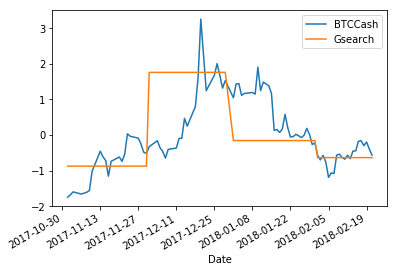

In [16]:
pair = df_use.loc[:, lambda df_use: ['BTCCash', 'Gsearch']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

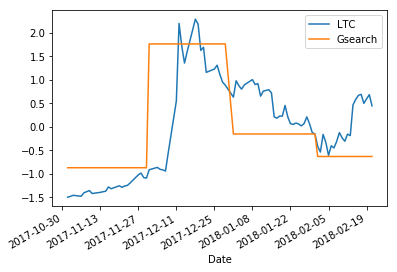

In [17]:
pair = df_use.loc[:, lambda df_use: ['LTC', 'Gsearch']]
pair = (pair-pair.mean())/pair.std()   # Normalize
pair.plot()

Based on domain knowledge, we decided candidates for <b>PCA</b>(Principle Component Analysis):<br>
<b>(NASDAQ_Price, S&P), (BTCCash, LTC)</b>

<br>
## <b>CONDUCT PCA</b>

<br>
## <b>MODEL TRAINING</b>

<br>
## <b>VALIDATION</b>

<br>
## <b>RESULT</b>
<b>DATA ABLATION STUDY</b>

<br>
## <b>POSSIBLE IMPROVEMENTS</b>

## REFERENCE
1) data & Linear Regression:<br>
https://www.kaggle.com/acornec/bitcoin-predictions<br>
2) data exploration:<br>
https://github.com/anvithaananth/bitcoin_marketprice_prediction/blob/master/project1_bitcoin_final_submission.ipynb<br>
3) CNN: <br>http://cs231n.github.io/convolutional-networks/ <br>
http://yann.lecun.com/exdb/publis/pdf/lecun-bengio-95a.pdf